# Cloud evolution

## Evolution equations

The evolution of the cloud (boson mass $m_b = \hbar /(\mu c^2)$) is described within the quasiadiabatic approximation by a system of coupled differential equations (see e.g. [arXiv:1411.0686](http://stacks.iop.org/0264-9381/32/i=13/a=134001?key=crossref.8a4e2e36ca36fb28e1d0a6868573e646)).
These determine the rate of change of the cloud's mass ($\dot{M}_c= \dot{E}_c/c^2$) and angular momentum ($\dot{J}_c$) in terms of the power ($P_{gw}$) and angular momentum ($\dot{J}_{gw} = P_{gw}/\omega_R$) radiated in GWs  and the black-hole parameters ($M, J$), which is possibly affected by accretion ($\dot{M}_{\rm Acc}, \dot{J}_{\rm Acc}$).

\begin{align}
\dot{M}_c^{\rm (sr)} &= 2 M_c \omega_I\\
\dot{M} &= - \dot{M}_c^{\rm (sr)} + \dot{M}_{\rm Acc}\\
\dot{M} + \dot{M}_c &= - P_{gw}/c^2 + \dot{M}_{\rm Acc} \\
\dot{J} &= - m c^2 \dot{M}_c^{\rm (sr)} / \omega_R + \dot{J}_{\rm Acc}\\
\dot{J} + \dot{J}_c &= - m P_{gw}/\omega_R + \dot{J}_{\rm Acc}\, ,
\end{align}

where $\dot{M}_c^{\rm (sr)}$ is the change in the cloud mass due to superradiance only ($\dot{M}_c = \dot{M}_c^{\rm (sr)} - P_{gw}/c^2$), and $\omega = \omega_R + i \omega_I$ is the boson field frequency. In the case of no accretion, this simplifies to

\begin{align}
\dot{M} &= - 2 M_c \omega_I\\
\dot{M} + \dot{M}_c &= - P_{gw}/c^2 \\
\dot{J} &=- 2 m c^2 M_c \omega_I / \omega_R \\
\dot{J} + \dot{J}_c &= - m P_{gw}/\omega_R \, .
\end{align}

we can solve these equations numerically, starting from some initial parameters $(M_0, J_0, M_{c,0}, J_{c,0})$.

## Numerical setup

Set up the above system of DE's in a way ammenable to numerical treatment.

### No accretion

Define dimensionless $(x, y, j^x, j^y, {\cal P}, w, \tau)$ quantities such that
\begin{align}
M &= \alpha x\\
M_c &= \alpha y \\
J &= \beta j^x\\
J_c &= \beta j^y\\
P_{gw} &= \gamma {\cal P}\\
\omega &= w \mu\\
t &= \epsilon \tau\, .
\end{align}
We will make sure these are dimensionless by defining the dimensionful factors
\begin{align}
\alpha &= M_0 \\
\beta &= M_0 c^2 \mu^{-1} \\
\gamma &= M_0 c^2 \mu \\
\epsilon &= \mu^{-1}\, ,
\end{align}
and letting $\mu = \hbar/(m_b c^2)$ be the Compton frequency associated with the boson rest mass, $m_b$.
We will also let $M_0$ be the *initial* black-hole mass.
Note that then we have:
\begin{align}
a &= \frac{c j_x \epsilon}{x} \\
\chi &= \frac{j_x}{x^2} \frac{\epsilon}{T_0}\, ,
\end{align}
where we have defined the horizon crossing time $T_0 = G M_0/c^3$.
Also note that the SR condition is saturated when
\begin{equation}
\left( \frac{2}{m} \frac{T_0}{\epsilon}\right)^2 = \frac{j_x}{x^2\left(mx-j_x\right)}
\end{equation}

With the above notation, the BHB evolution equations become:
\begin{align}
x' &= -2 w_I y\\
x' + y' &= -{\cal P}\\
(j^x)' &= -2 m w_I w_R^{-1} y\\
(j^x)' + (j^y)' &= -m w_R^{-1} {\cal P}
\end{align}
for $m$ the boson magnetic quantum number ($m=1$ for dominant scalar level), and where the prime denotes ${\rm d}/{\rm d}\tau$.
We may turn these into finite-difference equations to obtain:
\begin{align}
x_{i+1} &= x_i -2 w^I_i y_i \delta \tau \\
y_{i+1} &= y_i + 2 w^I_i y_i \delta\tau -{\cal P}_i \delta \tau\\
j^x_{i+1} &= j^x_i -2 m (w^I_i/ w^R_i) y_i \delta \tau\\
j^y_{i+1} &= j^y_i + m \left( 2 w^I_i y_i -  {\cal P}_i\right)\delta \tau / w^R_i
\end{align}
These can be evolved from $(x_0, y_0, j^x_0, j^y_0)$ until the SR spin threshold is reached.
The final state can then be converted into physical units using the scalings defined above.

### Adding back accretion

In the presence of accretion, we may define the dimensioless accretion mass and angular momentum rates:

\begin{align}
{\cal M}_a ' &\equiv c^2 \gamma^{-1} \dot{M}_{\rm Acc} = (M_0 \mu)^{-1} \, \dot{M}_{\rm Acc} \\
{\cal J}_a ' &\equiv\, \epsilon \beta^{-1} \dot{J}_{\rm Acc} = (M_0 c^2)^{-1} \dot{J}_{\rm Acc} \, ,
\end{align}

so that the evolution equations become:

\begin{align}
x' &= -2 w_I y + {\cal M}_a '\\
x' + y' &= -{\cal P} + {\cal M}_a '\\
(j^x)' &= -2 m w_I w_R^{-1} y + {\cal J}_a' \\
(j^x)' + (j^y)' &= -m w_R^{-1} {\cal P} + {\cal J}_a' \, .
\end{align}

The corresponding finite-difference equations are:
\begin{align}
x_{i+1} &= x_i -2 w^I_i y_i \delta \tau + {\cal M}_a' \delta\tau  \\
y_{i+1} &= y_i + 2 w^I_i y_i \delta\tau -{\cal P}_i \delta \tau \\
j^x_{i+1} &= j^x_i -2 m (w^I_i/ w^R_i) y_i \delta \tau  + {\cal J}_a' \delta\tau\\
j^y_{i+1} &= j^y_i + m \left( 2 w^I_i y_i -  {\cal P}_i\right)\delta \tau / w^R_i \, ,
\end{align}

assuming that the accretion rate is constant.
Note that accretion only affects the BH quantities ($x, j^x$) by construction, because we assumed no direct interaction between the cloud and the accretion disk.

# Evolving forward

In [1]:
%pylab inline
import gwaxion

Populating the interactive namespace from numpy and matplotlib


## Final state

The `gwaxion` package can use the above equations (ignoring cloud angular momentum and GW power) to automatically obtain the final (post-superradiance) properities of a given black-hole--boson (BHB) system. Simply make sure this feature is turned on through the `evolve` argument when creating a `BosonCloud` object.

Here's an example for the $\ell=m=1$ cloud from pre-superradiance BH with $60\, M_\odot$ and $\chi=0.7$, and a boson such that $\alpha=0.176$.

In [2]:
c = gwaxion.BosonCloud.from_parameters(1, 1, 0, evolve=True, m_bh=60,
                                       chi_bh=0.7, alpha=0.176)

Print some post-superradiance parameters, which will be internally computed using the above DEs.

In [3]:
l = [
    "Final BH mass: %.2f Msun" % c.bhb_final.bh.mass_msun,
    "Final BH spin: %.3f" % c.bhb_final.bh.chi,
    "Final BH J: %.2e" % c.bhb_final.bh.angular_momentum,
    "Final alpha: %.3f" % c.bhb_final.alpha,
    "Final cloud mass: %.2f Msun" % c.mass_msun
]
print('\n'.join(l))

Final BH mass: 58.89 Msun
Final BH spin: 0.617
Final BH J: 1.88e+45
Final alpha: 0.173
Final cloud mass: 1.11 Msun


If the DE evolution is turned off with `evolve=False`, then the code approximates the final BH parameters using Eqs. (25) and (26) in [arXiv:1706.06311](https://arxiv.org/abs/1706.06311), with constant $\alpha$ corresponding to the initial BH parameters.

The result is slightly different:

In [4]:
c_approx = gwaxion.BosonCloud.from_parameters(1, 1, 0, evolve=False, m_bh=60,
                                              chi_bh=0.7, alpha=0.176)

In [5]:
l = [
    "Final BH mass: %.2f Msun" % c_approx.bhb_final.bh.mass_msun,
    "Final BH spin: %.3f" % c_approx.bhb_final.bh.chi,
    "Final BH J: %.2e" % c_approx.bhb_final.bh.angular_momentum,
    "Final alpha: %.3f" % c_approx.bhb_final.alpha,
    "Final cloud mass: %.2f Msun" % c_approx.mass_msun
]
print('\n'.join(l))

Final BH mass: 59.21 Msun
Final BH spin: 0.624
Final BH J: 1.93e+45
Final alpha: 0.174
Final cloud mass: 0.79 Msun


## Evolution

We can study the evolution of the system during the superrandiance process by looking at the properties of the BHB system over time. To do this with `gwaxion` we need to call the DE solver directly.

We can start from the `BosonCloud` object we defined above, and call the internal method `_evolve_instability()`

In [6]:
bhb_final, (xs, jxs, ys, inv_wRs, wIs, sr_conds, times)  = c._evolve_instability()

The `bhb_final` object contains the final state of the evolution, and should give the same results as above, e.g.

In [7]:
l = [
    "Final BH mass: %.2f Msun" % bhb_final.bh.mass_msun,
    "Final BH spin: %.3f" % bhb_final.bh.chi,
    "Final BH J: %.2e" % bhb_final.bh.angular_momentum,
    "Final alpha: %.3f" % bhb_final.alpha,
]
print('\n'.join(l))

Final BH mass: 58.89 Msun
Final BH spin: 0.617
Final BH J: 1.88e+45
Final alpha: 0.173


The other outputs contain the quantities computed at each step of the DE evolution: $x$, $j^x$, $y$, $w_R^{-1}$, $w_I$, defined [above](#No-accretion); as well as the "SR factor", which vanishes when SR stops; and time.

For example, as time goes by, the superradiance quickly saturates until it stops:

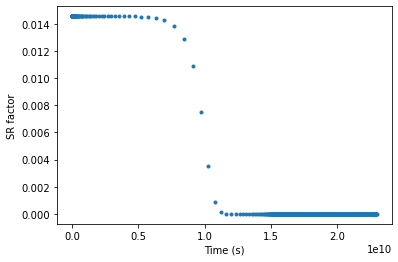

In [8]:
scatter(times, sr_conds, marker='.')
ylabel('SR factor');
xlabel('Time (s)');

As this happens, the cloud grows in mass at the expense of the BH:

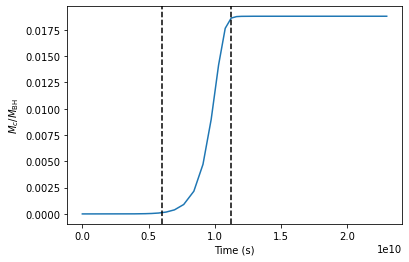

In [9]:
plot(times, ys/xs)
axvline(6E9, ls='--', c='k')
axvline(6E9+1500*c.number_growth_time, ls='--', c='k')
xlabel('Time (s)');
ylabel(r'$M_c/M_{\rm BH}$');

Note that the timesteps are not equally separated, since the solver adapts the interval according to the evolution of the system:

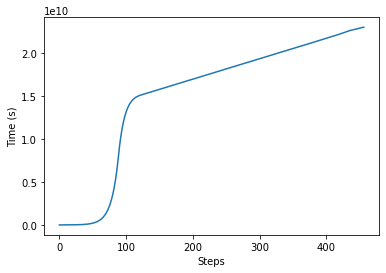

In [10]:
plot(times)
xlabel('Steps');
ylabel('Time (s)');